### Average over multiple runs  - Phase or Amplotude noise - Method 1
### Goal : Understand if there is any dependence of the emittance growth rate on the number of runs over which the mean and the standard deviation for each turnare computed

- Plot the emittance growth in the presence of phase or amplitude noise - PN or An respectively. 
- The simulation for each set of parameters is repeated multiple times. 
- The mean and the standard deviation of the emittance values are computed for each turn over a number of runs given by the user.
- The normalised emittance is used here. 

In [62]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting paramerters

In [63]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [52]:
n_runs = 30 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev           = 299792458/circumference  # [Hz] The revolution frequency of the machine 
subsets_of_runs = [5, 10, 30] # Give the subsets of runs on which you want to calculate the emittance growth rate 
type_of_noise  = 'AN'

In [67]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/AN_mytest'
PN_name_template = 'file'

In [68]:
# phase noise
ex_dict_pn = {} # type: dictionary
ey_dict_pn = {}

for run in range(n_runs):
    temp_name = 'run{}'.format(run+1) # the suffix of the name of the current study
    # A. load the turn by turn data in a dictionary
    #temp_dict_pn = pickle.load( open( path_to_data+PN_name_template+temp_name+'.pkl', "rb" ) )
    tmeanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+'{}/'.format(run+1)+ 'file.txt' , delimiter = ",", unpack = True)
    # B. Create a different list for each run and save the emittance values
    ex_dict_pn[temp_name] = emitX 
    ey_dict_pn[temp_name] = emitY

OSError: /afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/AN_mytest1/file.txt not found.

#### 2) Here the mean and the standard deviation of the emittance values are computed over the requested number of runs. 

In [55]:
ex_mean_pn = {} # type: dict
ey_mean_pn = {}

ex_std_pn = {}
ey_std_pn = {}


n_saved_turns = int(n_turns/decTurns)

for subset in subsets_of_runs:
    ex_mean_pn[str(subset)] = []
    ey_mean_pn[str(subset)] = []     
    ex_std_pn[str(subset)]  = []
    ey_std_pn[str(subset)]  = []

for turn in range(int(n_saved_turns)):
    ex_temp_pn = []
    ey_temp_pn = []

    # keep all the emittance values for all the runs
    for run in range(n_runs):
        temp_name = 'run{}'.format(run+1)
        ex_temp_pn.append(ex_dict_pn[temp_name][turn])
        ey_temp_pn.append(ey_dict_pn[temp_name][turn])
        
        # create lists for the subsets of runs
        if run+1 in subsets_of_runs:
            # calculate and append the mean of the emittance value for every turn                       
            ex_mean_pn[str(run+1)].append(np.mean(ex_temp_pn))
            ey_mean_pn[str(run+1)].append(np.mean(ey_temp_pn))
            # calculate and append the standard deviation of the emittance value for every turn
            ex_std_pn[str(run+1)].append(np.std(ex_temp_pn))
            ey_std_pn[str(run+1)].append(np.std(ey_temp_pn))    

#### 3) Convert turns to time [s]

In [56]:
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

#### 4) Plot evolution of the H (horizontal emittance) emittance for the different number of runs used in the calculation of the mean

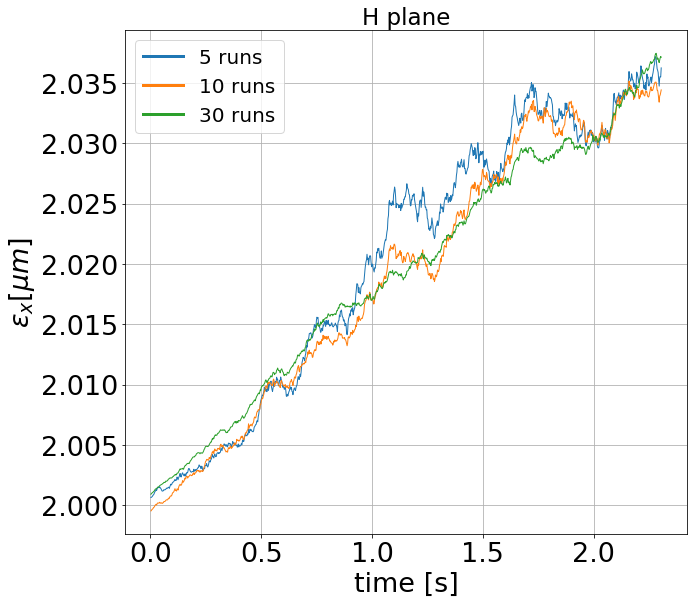

In [57]:
# loop over the different subsets
for index, subset in enumerate(subsets_of_runs):
    # Indicate which color will be used for the current subset of runs used
    color = 'C{}'.format(index)
    # plotting
    plt.plot(tspan, np.array(ex_mean_pn[str(subset)])*1e6, c = color)
    plt.plot(2, 2, c =color,  label = '{} runs'.format(subset), linewidth = 3)   
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_x [\mu m]$')
plt.title('H plane')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('H_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_different_n_of_runs.png'.format(type_of_noise))

#### 4) Plot evolution of the V (vertical emittance) emittance for the different number of runs used in the calculation of the mean.

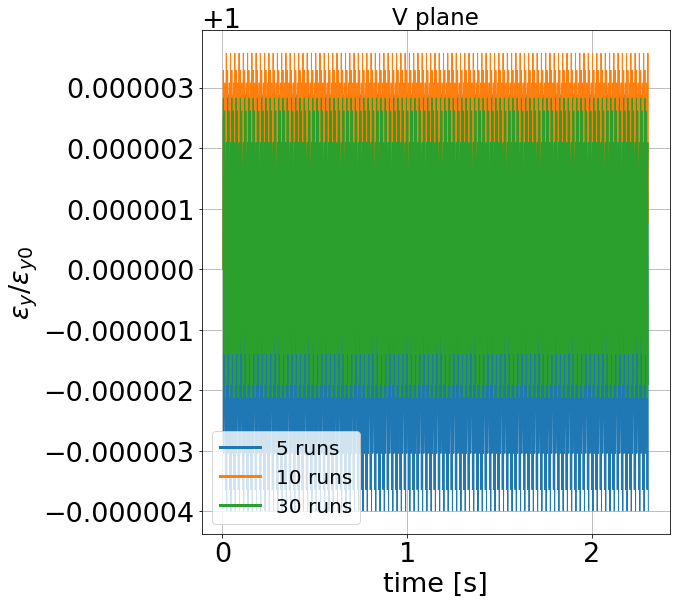

In [58]:
# loop over the different subsets
for index, subset in enumerate(subsets_of_runs):
    # Indicate which color will be used for the current subset of runs used
    color = 'C{}'.format(index)
    # plotting
    plt.plot(tspan, ey_mean_pn[str(subset)]/ey_mean_pn[str(subset)][0], c = color)
    plt.plot(1,1, c =color,  label = '{} runs'.format(subset), linewidth = 3)   
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y / \epsilon_{y0}$')
plt.title('V plane')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_different_n_of_runs.png'.format(type_of_noise))

#### 5) Plot evolution of the standard deviation $\sigma$ of the emittance values (in the horizontal plane) for the different number of runs used.

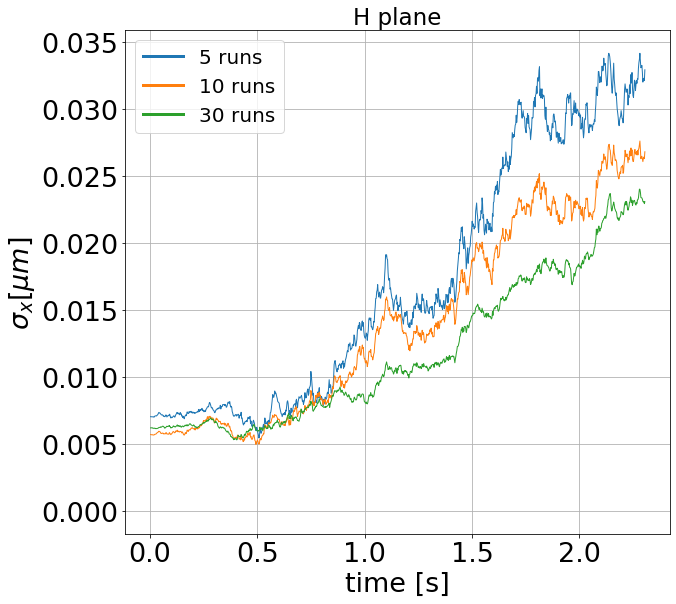

In [59]:
# loop over the different subsets
for index, subset in enumerate(subsets_of_runs):
    # Indicate which color will be used for the current subset of runs used
    color = 'C{}'.format(index)
    # plotting
    plt.plot(tspan,  np.array(ex_std_pn[str(subset)])*1e6, c = color)
    plt.plot(0,0, c =color,  label = '{} runs'.format(subset), linewidth = 3)   
plt.xlabel('time [s]')
plt.ylabel(r'$\sigma_x [\mu m]$')
plt.title('H plane')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('H_std_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_different_n_of_runs.png'.format(type_of_noise))

#### 6) Calculate the emittance growth rate via a linear fit - H plane
- Polynomial fit. The degree of the fitting polynomial is 1. 
- H plane only

In [60]:
m_list = []
b_list = []
err_list = []

for subset in subsets_of_runs:
    # linear fit
    [m_temp, b_temp], cov_temp = np.polyfit(tspan, ex_mean_pn[str(subset)], 1, cov=True)
    m_list.append(m_temp)
    b_list.append(b_temp)
    # compute the error of the gradient of the fit slope
    err_list.append(np.sqrt(np.diag(cov_temp)))

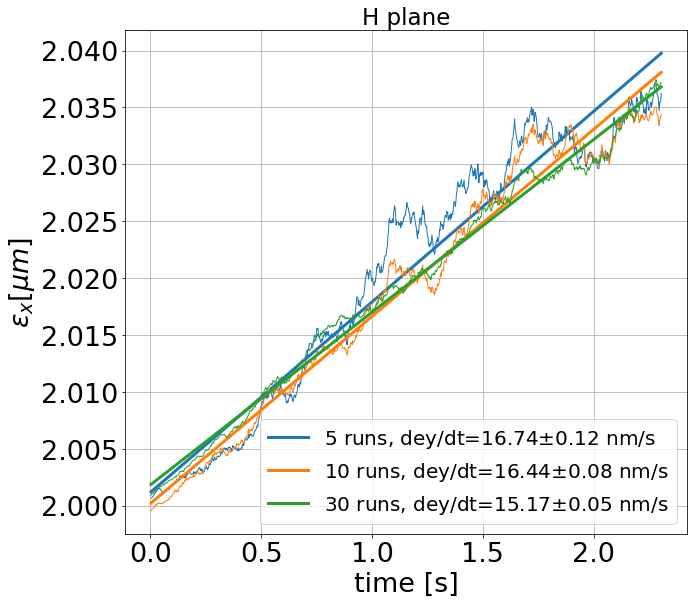

In [61]:
# loop over the different subsets
for index, subset in enumerate(subsets_of_runs):
    # Indicate which color will be used for the current subset of runs used
    color = 'C{}'.format(index)
    # plotting
    plt.plot(tspan, np.array(ex_mean_pn[str(subset)])*1e6, c = color)
    plt.plot(tspan, (m_list[index]*tspan+b_list[index])*1e6, c = color, label='{0:.0f} runs, '.format(subset) + 'dey/dt={0:.2f}'.format(m_list[index]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_list[index][0]*1e9), linewidth = 3)
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_x [\mu m]}$')
plt.title('H plane')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('H_linear_fit_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_different_n_of_runs.png'.format(type_of_noise))